# **Analysis on Customer Attrition of Orange Telecom Company**
## **Team Member**


1.   Lim Chia Chung (20WMR08877)
2.   Lee Kah Wei (20WMR08874)
3.   Lim Yih Feng (20WMR08880)
4.   Lee Jun Xian (20WMR08873)



# **1. Business Understanding**
## **1.1 Company Background**
Orange is a multinational telecommunication corporation that provides telecommunications services in France. Basically, it has 266 million customers worldwide and 89,000 employees in France. It started in 1994 when Hutchison Whampoa acquired a majority interest in Microtel Communications in the early 1990s and rebranded it as “Orange”. It has become a Mannesmann company in 1999 and was purchased by France Telecom in 2000. Lastly, the business was rebranded as Orange in July 2013. 

## **1.2 Objectives**
In the telecommunication sector customer attrition / churn is an essential concern for the large company. Considering customer attrition is increasing and directly affected the revenues of company, therefore Orange Telecom wanted to do a prediction in order to find out the factors that cause the customer attrition rates keep increasing and take necessary action immedaitely to resolve it. As a result, an analysis of customer attrition is developed.

## **1.3 Inventory of Resources**
The students from Bachelor of Computer Science (Honours) in Data Science Year 2 Group 3. The teammates included Lim Chia Chung (20WMR08877), Lee Kah Wei (20WMR08874), Lim Yih Feng (20WMR08880), and Lee Jun Xian(20WMR08873) who are helping the Orange Telecom in developing a focused customer retention programs. The dataset used is retrieved from Kaggle website (https://www.kaggle.com/mnassrib/telecom-churn-datasets). The software used develop this assignment is Google Colaboratory, which can be accessed from Google Drive.

## **1.4 Requirements, assumptions and constraints**
The project is required to be finished by 11:59 p.m of 13th September 2020. The dataset is accessible by the public, therefore there is no legality issues as well as any data security issues. 

## **1.5 Risks and Contingencies**
The data obtained is cleaned before-hand, therefore there are will be no risk and contigency for this dataset.

## **1.6 Costs and Benefits**
The operational advantages are able to increase sales if we know the reason of customer churn and solve the problem. The tactical advatages are able to retain customer and increase customer satisfaction since we already know the customer behaviour.

# **2. Data Understanding**
## **2.1 Import Library**




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install the required library using pip
!pip3 install graphviz
!pip3 install pydotplus
!pip3 install plotly

In [ ]:
import pandas as pd
import numpy as np
import math
import itertools

# Visualization
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

# Normalization
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 

# Ignore Warning Message
import warnings
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning, DataConversionWarning
warnings.filterwarnings(action = 'ignore', category = DataConversionWarning)
warnings.filterwarnings(action = 'ignore', category = ConvergenceWarning)

from IPython.display import Image  
import pydotplus
from scipy import stats 

# Visualization
import plotly
import plotly.express as px 
import plotly.io as pio 
import plotly.offline as py 
import plotly.graph_objs as go 
import plotly.tools as tls 
import plotly.figure_factory as ff 

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


## **2.2 Data Overview**
This dataset basically contains 20 columnns and 667 rows in total. The data types consist of 3 object type, 8 float type, 8 integer type and 1 boolean type.


### **Object Type**
"State", "International plan", "Voice mail plan", 

### **Float Type**
"Total day minutes", "Total day charge", "Total eve minutes", "Total eve charge", "Total night minutes", "Total night charge", "Total intl minutes", "Total intl charge"

### **Interger Type**
"Account length", "Area Code", "Number vmail messages", "Total day calls", "Total eve calls", "Total night calls", "Total intl calls", "Customer service calls"

### **Categrical Values**
Nominal: "State", "International plan", "Voice mail plan", "Churn"

Ordinal: "Account length", "Area code"

### **Continuous Values**
Interval:  - 

Ratio: "Total day minutes", "Total day charge", "Total eve minutes", "Total eve charge", "Total night minutes", "Total night charge", "Total intl minutes", "Total intl charge", "Number vmail messages", "Total day calls", "Total eve calls", "Total night calls", "Total intl calls", "Customer service calls"

### **X variables**
All columns are included except "State" and "Churn" columns.

### **Y variable**
"Churn"

### **Missing Value**
None

### **Variables Breakdown**
**STATE**: 51 Unique States in United States of America

**Account Length**: Length of The Account

**Area Code**: 415 relates to San Francisco, 408 is of San Jose and 510 is of City of Okland

**International Plan**: Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan**: Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages**: Number of Voice Mail Messages ranging from 0 to 50

**Total day minutes**: Total Number of Minutes Spent By Customers in Morning

**Total day calls**: Total Number of Calls made by Customer in Morning.

**Total day charge**: Total Charge to the Customers in Morning.

**Total eve minutes**: Total Number of Minutes Spent By Customers in Evening

**Total eve calls**: Total Number of Calls made by Customer in Evening.

**Total eve charge**: Total Charge to the Customers in Morning.

**Total night minutes**: Total Number of Minutes Spent By Customers in the Night.

**Total night calls**: Total Number of Calls made by Customer in Night.

**Total night charge**: Total Charge to the Customers in Night.



In [ ]:
d# Import datset and display
telco_customer = pd.read_csv('/content/drive/Shared drives/BACS 3013 Data Science/telco_customer_churn.csv')
telco_customer.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
print ("Rows     : " , telco_customer.shape[0])
print ("Columns  : " , telco_customer.shape[1])
print ("Features : \n" , telco_customer.columns.tolist())

Rows     :  667
Columns  :  20
Features : 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn']


In [ ]:
print ("Unique values :  \n",telco_customer.nunique())

Unique values :  
 State                      51
Account length            179
Area code                   3
International plan          2
Voice mail plan             2
Number vmail messages      37
Total day minutes         562
Total day calls           100
Total day charge          562
Total eve minutes         557
Total eve calls            94
Total eve charge          528
Total night minutes       568
Total night calls          96
Total night charge        453
Total intl minutes        132
Total intl calls           17
Total intl charge         132
Customer service calls      9
Churn                       2
dtype: int64


In [ ]:
telco_customer.shape

(667, 20)

In [ ]:
telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [ ]:
telco_customer.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [ ]:
# Detect any missing value from dataset
count = telco_customer.isnull().sum().sort_values(ascending = False)
percentage = ((telco_customer.isnull().sum() / len(telco_customer) * 100).sort_values(ascending = False))
data_missing = pd.concat([count, percentage], axis = 1, keys = ['Count', 'Percentage'])

print('Count and Percentage of missing values for the columns: ')
data_missing

Count and Percentage of missing values for the columns: 


,Count,Percentage
Churn,0,0.0
Customer service calls,0,0.0
Account length,0,0.0
Area code,0,0.0
International plan,0,0.0
Voice mail plan,0,0.0
Number vmail messages,0,0.0
Total day minutes,0,0.0
Total day calls,0,0.0
Total day charge,0,0.0


## **2.3 Data Manipulation**


In [ ]:
# Drop the meaningless column
telco_customer = telco_customer.drop('Account length',axis=1)
telco_customer.head()

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [ ]:
# Area Code
telco_customer['Area code'].unique()

array([408, 415, 510])

In [ ]:
# Separating churn and non churn customers
churn = telco_customer[telco_customer["Churn"] == 1]
not_churn = telco_customer[telco_customer["Churn"] == 0]

# Separating catagorical and numerical columns
target_col = ["Churn"]
state_col = ["State"]

## Category Columns
cat_cols   = telco_customer.nunique()[telco_customer.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]

# Numeric columns
num_cols   = [x for x in telco_customer.columns if x not in cat_cols + target_col]

## **2.4 Exploratory Data Analysis (EDA)**
### **2.4.1 Customer Attrition in Data**

In [ ]:
lab = telco_customer["Churn"].value_counts().keys().tolist()
#values
val = telco_customer["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  ['blue' ,'green'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = 0.5
              )
layout = go.Layout(dict(title = "Customer Attrition in Data", title_x = 0.5, plot_bgcolor  = "rgb(243,243,243)", paper_bgcolor = "rgb(243,243,243)",))

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

### **2.4.2 Variables Distribution in Custmer Attrition**



In [ ]:
#function  for pie plot for customer attrition types
def plot_pie(column) :
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")),
                    hole    = 0.6
                   )
    
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [.52,1]),
                    name    = "Non churn customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")),
                    hole    = 0.6
                   )

    layout = go.Layout(dict(title = column + " Distribution in Customer Attrition ",
                            title_x = 0.5,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .19, y = .5),
                                           dict(text = "Non Churn Customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .83,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [ ]:
#for all categorical columns plot pie
for i in cat_cols :
    plot_pie(i)

In [ ]:
#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black")),
                          opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black")),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " Distribution in Customer Attrition ",
                            title_x = 0.5,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

In [ ]:
#for all integer columns plot histogram    
for i in num_cols :
    histogram(i)

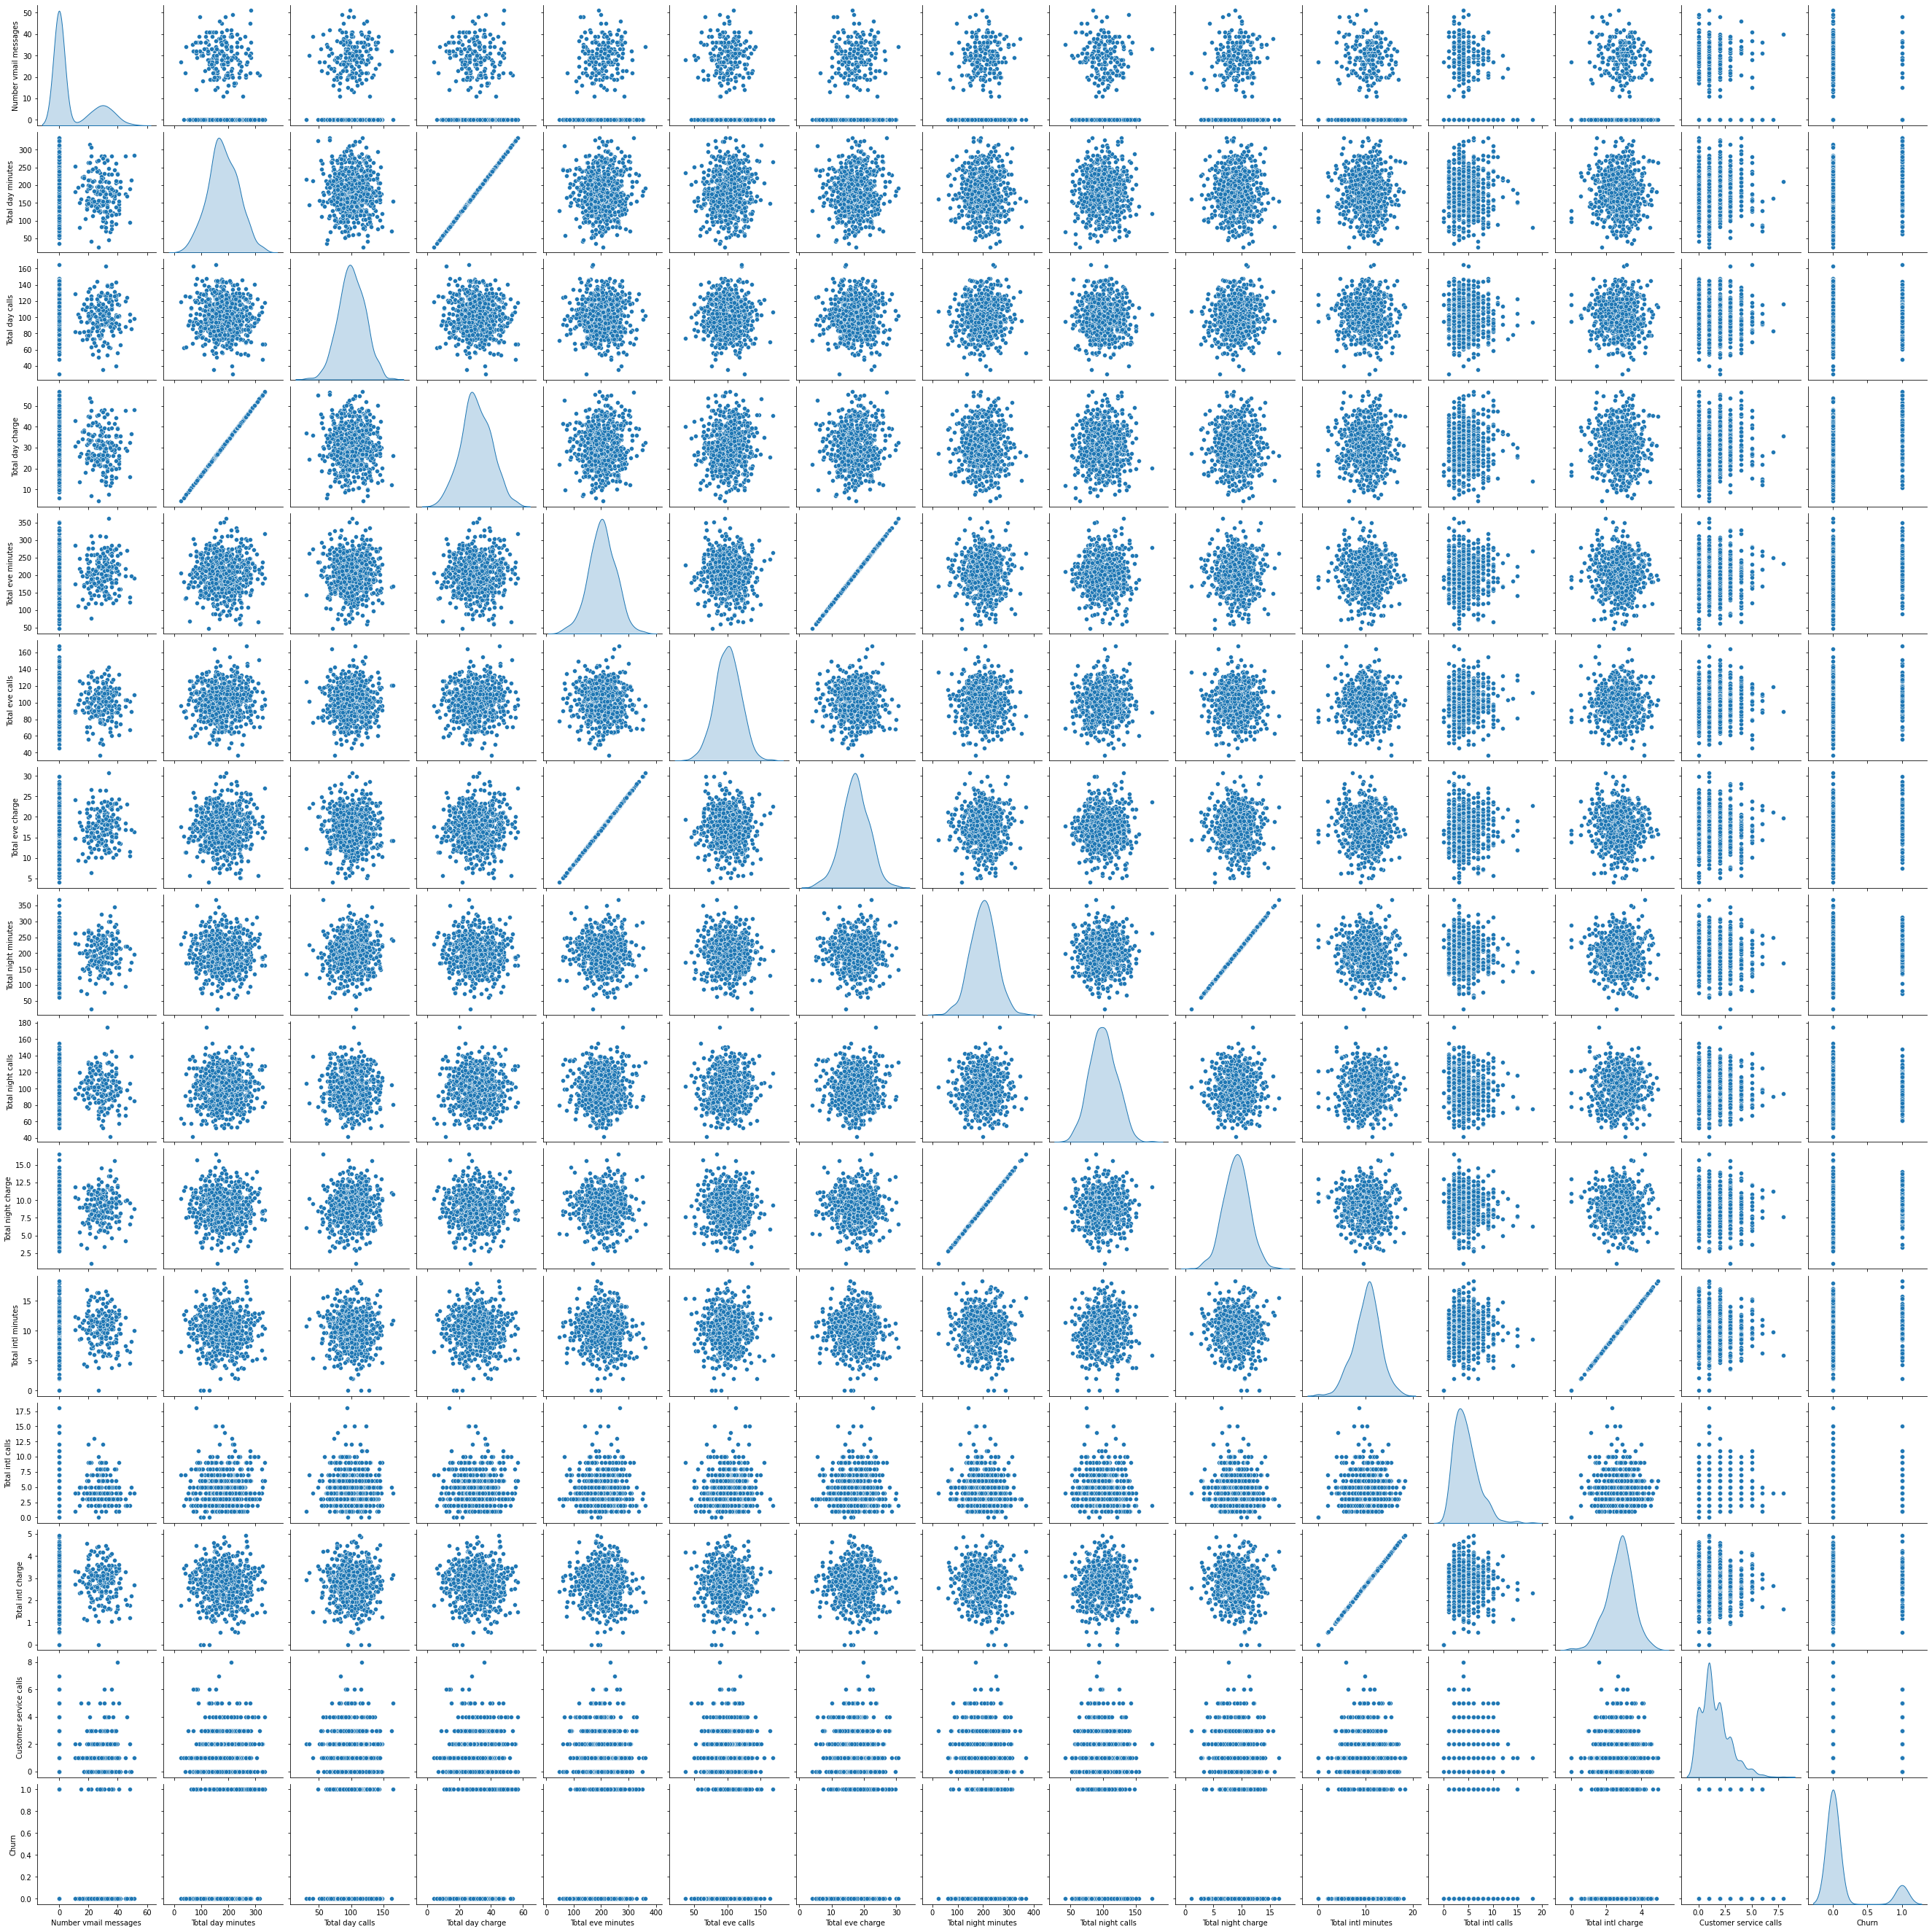

In [ ]:
output_cols = list(set(telco_customer.nunique()[telco_customer.nunique() < 6].keys().tolist() + telco_customer.select_dtypes(include = 'object').columns.tolist()))
visualize_cols = [x for x in telco_customer.columns if x not in output_cols] + ['Churn']

sns.pairplot(telco_customer[visualize_cols], diag_kind = "kde")
plt.show()

# **3. Data Preparation**
## **Outliers Checking**
The outlier are found from the numerical columns. The remove outliers action has been taken and replace it with median value, however the accuracy, recall, precision and f1-score are getting lower. Since the outliers are in the reasonable range, hence the code for handling outlier has been removed.

##  **Train Test Split**
The dataset will be spliting on the percentage basis which Training set is 80% and Testing set is 20%. The training set will be used to fit the model while the X test will be used to predict the y and finally make comparison with y test

## **Data Transformation**
### **Standardization**
Standardizing is a scaling technique where the features around the center and 0 with a standard deviation of 1 is important when we compare measurements which have different units. The numerical data have been transform by using the Standard Scaller in the scikit-learn preprocessing library. 

### **Label Encoding**
Label Encoding refers to refers to the conversion labels into a numeric column no matter it is a boolean or char type as well as convert them to machine-readle format. The ML algorithms can make a better decision on how to operate these labels. In this case, Label Encoding is an important pre-processing step before proceed to supervised learning. For example, when we are dealing with KNN algorithm since KNN only supports numeric, therfore Label Encoding would be helpful on it.



## **3.1 Outliers Checking**

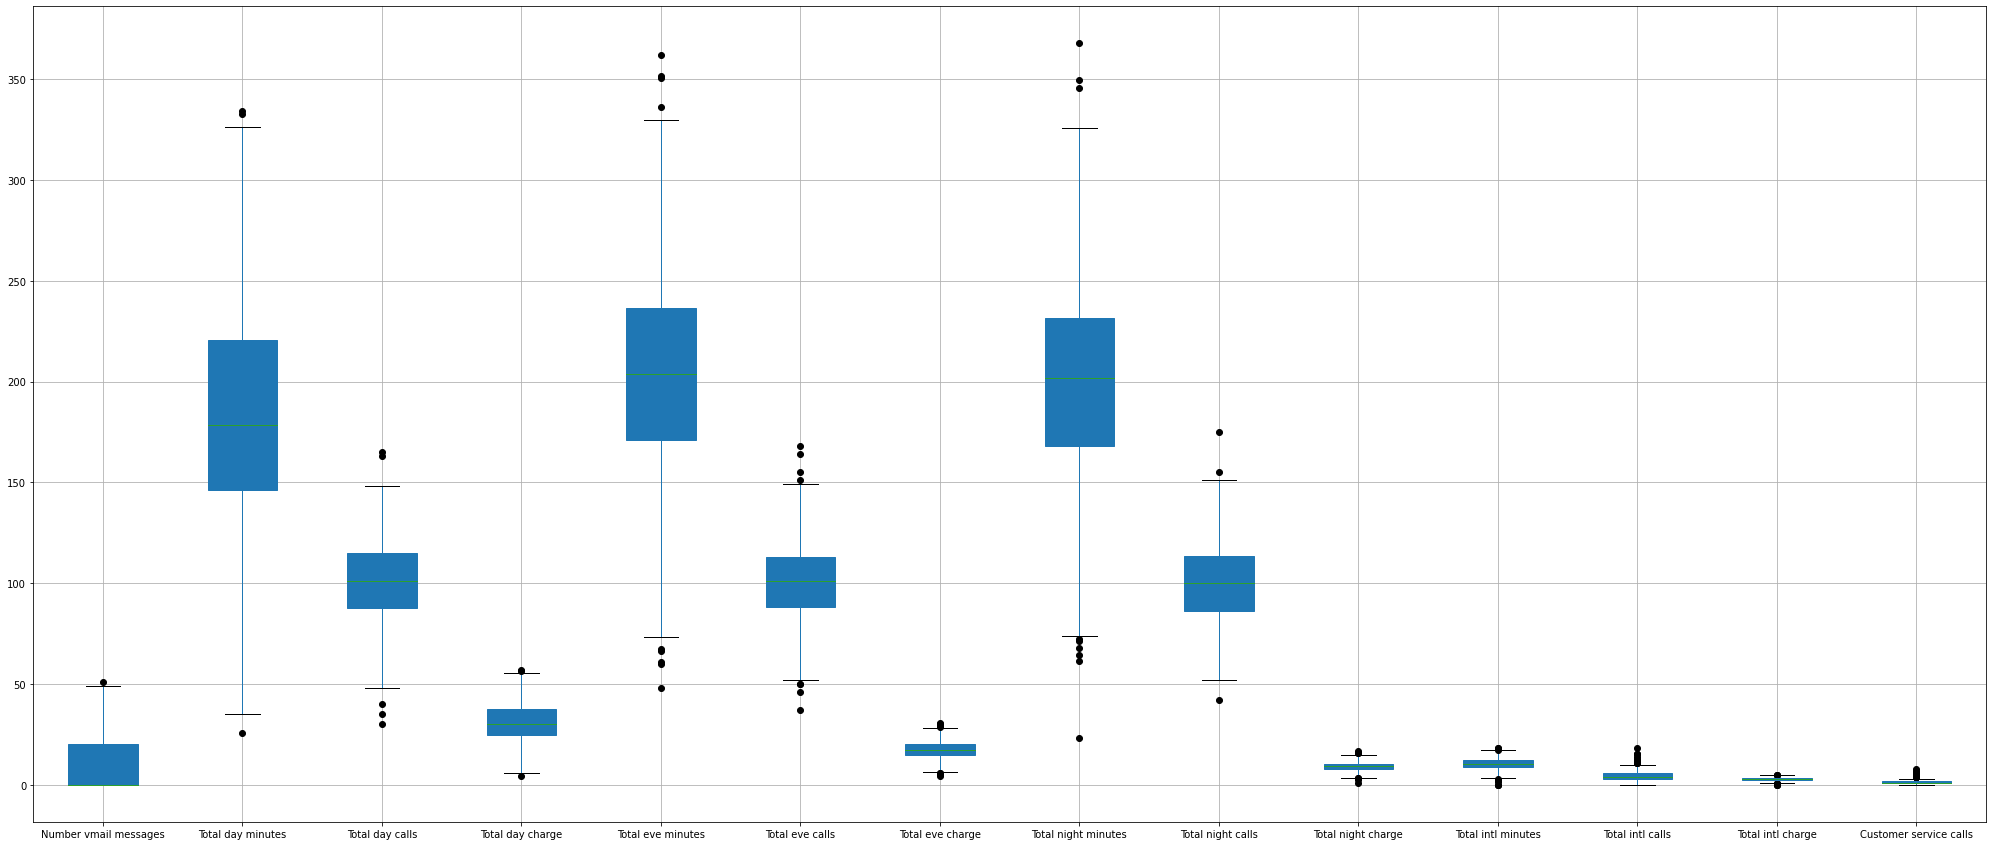

In [ ]:
outliers = telco_customer[num_cols]
plt.subplots(figsize = (35, 15))
outliers.boxplot(patch_artist = True, sym = "k")

## **3.2 Train Test Split**

In [ ]:
# Train Test Split
cols = [i for i in telco_customer.columns if i not in target_col]

X = telco_customer[cols]
y = telco_customer[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Training set length : {}\nTesting set length  : {}'.format(X_train.shape[0], X_test.shape[0]))

Training set length : 533
Testing set length  : 134


## **3.3 Data Transformation**


In [ ]:
le = LabelEncoder()
std = StandardScaler()

In [ ]:
for i in state_col :
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

for i in cat_cols :
    X_train[i] = le.fit_transform(X_train[i])
    X_test[i] = le.transform(X_test[i])

X_train[num_cols] = std.fit_transform(X_train[num_cols])
X_test[num_cols] = std.transform(X_test[num_cols])

for i in target_col :
    y_train[i] = le.fit_transform(y_train[i])
    y_test[i] = le.transform(y_test[i])

## **3.4 Variable Summary**

In [ ]:
summary = (telco_customer[[i for i in telco_customer.columns if i not in cat_cols]].describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary, 3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'], summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data = [trace], layout = layout)
py.iplot(figure)

## **3.5 Correlation Matrix**

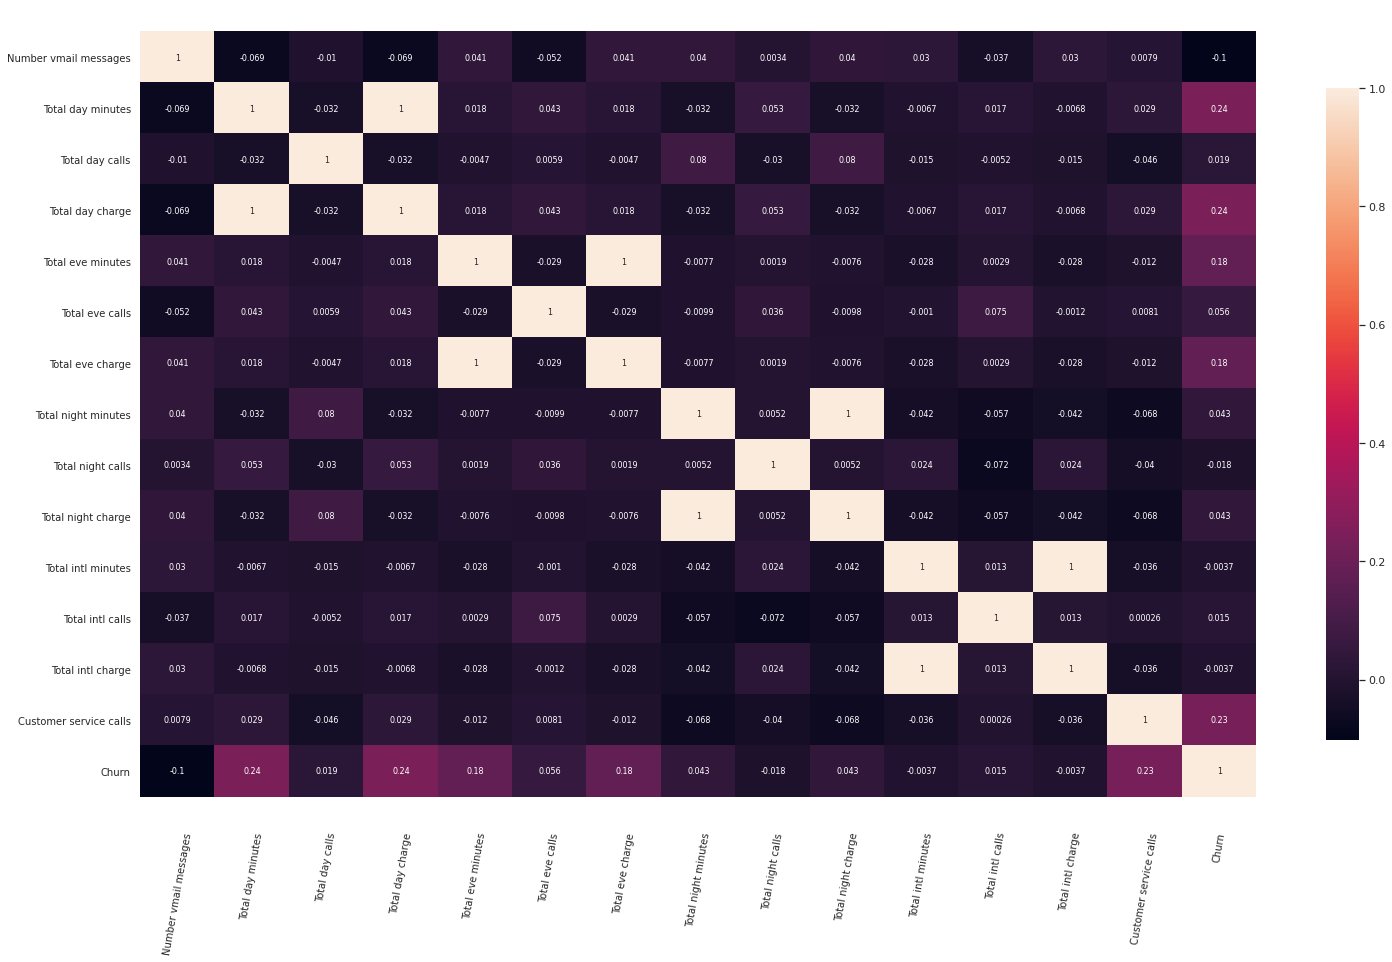

In [ ]:
sns.set(style="white")

# Creating the data
data = telco_customer[[i for i in telco_customer.columns if i not in cat_cols]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots( )

# Create a custom color palette
cmap = \
sns.diverging_palette(133, 10, as_cmap=True)  
# as_cmap returns a matplotlib colormap object rather than a list of colors
# Yellow = Good (low correlation), Dark Blue = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data = data, annot=True, ax=ax, 
                annot_kws = {"size": 8},  #Annotation size
                cbar_kws = {"shrink": 0.8} # Color bar size
               );

# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize = 10) 

ax.set_yticklabels(g.get_yticklabels(), rotation = 0);
ax.set_xticklabels(g.get_xticklabels(), rotation = 80);

# **4. Modelling**
## **Algorithm** 
There are 6 Supervised Machine Learning algorithm have been selected to develop a churn model in order to find out the best performance model to resolve customer attrition problem form Orange Telecom
## **4.1 KNN**
The K-nearest neighbours (KNN) algorithms is a non-parametric method that used for classification and regression. The input consists of the closest training example and the output is a class membership. An object is classified by a plurality vote of its neighbours, with the object being assigned to the class most common among its k nearest neighbours (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbour.

In [ ]:
knn = KNeighborsClassifier()

parameters = [{'leaf_size': list(range(1, 30)),
               'n_neighbors': list(range(1, 10)),
               'p' : [1, 2]}]

knn_grid = GridSearchCV(knn, parameters)
print(knn_grid.fit(X_train, y_train))

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                        23, 24, 25, 26, 27, 28, 29],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'p': [1, 2]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [ ]:
print(f'Best Score: {knn_grid.best_score_}')
print(f'Best Parameter List: {knn_grid.best_params_}')

Best Score: 0.8762123082348792
Best Parameter List: {'leaf_size': 1, 'n_neighbors': 5, 'p': 1}


Score: 0.9104477611940298
RMSE: 0.2992528008322899

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       119
           1       0.80      0.27      0.40        15

    accuracy                           0.91       134
   macro avg       0.86      0.63      0.68       134
weighted avg       0.90      0.91      0.89       134



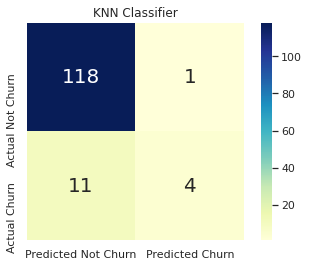

In [ ]:
print(f'Score: {knn_grid.score(X_test, y_test)}')

knn_pred = knn_grid.predict(X_test)
mse = mean_squared_error(y_test, knn_pred)
rmse =  math.sqrt(mse)
print(f'RMSE: {rmse}\n')

# Classification Report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, xticklabels = ['Predicted Not Churn', 'Predicted Churn'], yticklabels = ['Actual Not Churn', 'Actual Churn'],
annot = True, fmt = 'd', annot_kws = {'fontsize':20}, cmap="YlGnBu", square = True);

plt.title("KNN Classifier")
plt.subplots_adjust(wspace = .3,hspace = .3)

In [ ]:
print('Accuracy of KNN Classsifier on training set: {:.2f}'
     .format(knn_grid.score(X_train, y_train)))
print('Accuracy of KNN Classsifier on testing set : {:.2f}'
     .format(knn_grid.score(X_test, y_test)))

Accuracy of KNN Classsifier on training set: 0.90
Accuracy of KNN Classsifier on testing set : 0.91


In [ ]:
def Calculate_Plot_ROC(algorithm):
  # Prediction Probalities
  r_probs = [0 for _ in range(len(y_test))]
  roc_probs = algorithm.predict_proba(X_test)

  # Probabilities for the positive outcome is kept
  roc_probs = roc_probs[:, 1]

  # Calculate ROC
  r_auc = roc_auc_score(y_test, r_probs)
  roc_auc = roc_auc_score(y_test, roc_probs)

  # Calculate ROC curve
  r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
  fpr, tpr, _ = roc_curve(y_test, roc_probs)

  # Plot the ROC curve
  trace1 = go.Scatter(x = fpr,
                      y = tpr,
                      name = "Roc : " + str(r_auc),
                      line = dict(color = ('rgb(22, 96, 167)'),
                                  width = 2))

  trace2 = go.Scatter(x = [0,1],
                      y = [0,1],
                      line = dict(color = ('rgb(205, 12, 24)'),
                                  width = 2,
                                  dash = 'dot'))

  layout = go.Layout(dict(title = "ROC Curve" ,
                          autosize = False,
                          height = 500,
                          width = 800,
                          showlegend = False,
                          plot_bgcolor  = "rgb(243,243,243)",
                          paper_bgcolor = "rgb(243,243,243)",

                          xaxis = dict(title = "False Positive Rate",
                                      gridcolor = 'rgb(255, 255, 255)',
                                      domain=[0, 0.6],
                                      ticklen = 5,
                                      gridwidth = 2),
                          
                          yaxis = dict(title = "True Positive Rate",
                                      gridcolor = 'rgb(255, 255, 255)',
                                      zerolinewidth=1,
                                      ticklen = 5,
                                      gridwidth = 2),
                                      
                          margin = dict(b = 100),

                          xaxis2 = dict(domain = [0.7, 1],
                                        tickangle = 90,
                                        gridcolor = 'rgb(255, 255, 255)'),
                          
                          yaxis2 = dict(anchor = 'x2', 
                                        gridcolor = 'rgb(255, 255, 255)')
                          )
                    )
    
  roc = [trace1, trace2]
  py.iplot({'data': roc, 'layout':layout})

In [ ]:
Calculate_Plot_ROC(knn_grid)

## **4.2 Gaussian Naive Bayes**
Naive Bayes can be extended to real-valued attributes, most commonly by assuming a Gaussian distribution. This extension of naive Bayes is called Gaussian Naive Bayes. Other functions can be used to estimate the distribution of the data, but the Gaussian (or Normal distribution) is the easiest to work with because you only need to estimate the mean and the standard deviation from your training data.

GaussianNB(priors=None, var_smoothing=1e-09)

Score: 0.917910447761194
RMSE: 0.28651274358884277

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       119
           1       0.70      0.47      0.56        15

    accuracy                           0.92       134
   macro avg       0.82      0.72      0.76       134
weighted avg       0.91      0.92      0.91       134



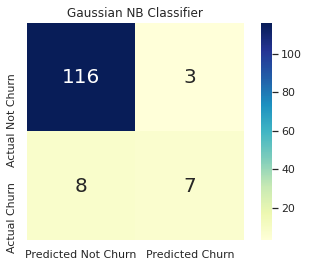

In [ ]:
nb = GaussianNB()
print(nb)

nb.fit(X_train, y_train)
print(f'\nScore: {nb.score(X_test, y_test)}')

nb_pred = nb.predict(X_test)
  mse = mean_squared_error(y_test, nb_pred)
  rmse =  math.sqrt(mse)
  print(f'RMSE: {rmse}\n')

# Classification Report
print(classification_report(y_test, nb_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, nb_pred)
sns.heatmap(cm, xticklabels = ['Predicted Not Churn', 'Predicted Churn'], yticklabels = ['Actual Not Churn', 'Actual Churn'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu", square = True);

plt.title("Gaussian NB Classifier")
plt.subplots_adjust(wspace = .3,hspace = .3)

In [ ]:
print('Accuracy of Gaussian NB Classsifier on training set: {:.2f}'
     .format(nb.score(X_train, y_train)))
print('Accuracy of Gaussian NB Classsifier on testing set : {:.2f}'
     .format(nb.score(X_test, y_test)))

Accuracy of Gaussian NB Classsifier on training set: 0.87
Accuracy of Gaussian NB Classsifier on testing set : 0.92


In [ ]:
Calculate_Plot_ROC(nb)

## **4.3 Logistic Regression**
Logistic Regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary). Like all regression analyses, the logistic regression is a predictive analysis. Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables. Moreover, different values for threshold were examined to decide the optimal one. The threshold is compared with the probability of an observation and decides whether it should be classified as 0 or 1.

In [ ]:
logistic = LogisticRegression()

parameters = [{'C': list(np.arange(1000, 2000, 200)),
               'fit_intercept': [True, False],
               'tol' : [1e-5,1e-4],
               'solver' : ['newton-cg','lbfgs']}]


log_grid = GridSearchCV(logistic, parameters)
print(log_grid.fit(X_train, y_train))

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1000, 1200, 1400, 1600, 1800],
                          'fit_intercept': [True, False],
                          'solver': ['newton-cg', 'lbfgs'],
                          'tol': [1e-05, 0.0001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [ ]:
print(f'Best Score: {log_grid.best_score_}')
print(f'Best Parameter List: {log_grid.best_params_}')

Best Score: 0.8479633221654028
Best Parameter List: {'C': 1000, 'fit_intercept': True, 'solver': 'newton-cg', 'tol': 1e-05}


Score: 0.9253731343283582
RMSE: 0.2731791823540765

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       119
           1       0.78      0.47      0.58        15

    accuracy                           0.93       134
   macro avg       0.86      0.72      0.77       134
weighted avg       0.92      0.93      0.92       134



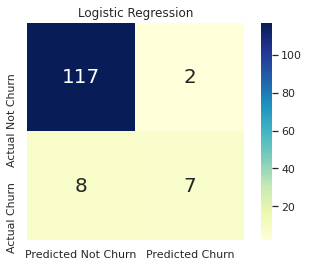

In [ ]:
print(f'Score: {log_grid.score(X_test, y_test)}')

log_pred = log_grid.predict(X_test)
mse = mean_squared_error(y_test, log_pred)
rmse =  math.sqrt(mse)
print(f'RMSE: {rmse}\n')

# Classification Report
print(classification_report(y_test, log_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, log_pred)
sns.heatmap(cm, xticklabels = ['Predicted Not Churn', 'Predicted Churn'], yticklabels = ['Actual Not Churn', 'Actual Churn'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu", square = True);

plt.title("Logistic Regression")
plt.subplots_adjust(wspace = .3,hspace = .3)

In [ ]:
print('Accuracy of Logistic Regression Classsifier on training set: {:.2f}'
     .format(log_grid.score(X_train, y_train)))
print('Accuracy of Logistic Regression Classsifier on testing set : {:.2f}'
     .format(log_grid.score(X_test, y_test)))

Accuracy of Logistic Regression Classsifier on training set: 0.87
Accuracy of Logistic Regression Classsifier on testing set : 0.93


In [ ]:
Calculate_Plot_ROC(log_grid)

### **Feature Importance (Logistic Regression)**


In [ ]:
log_fi = pd.DataFrame(log_grid.best_estimator_.coef_.ravel())

column_df = pd.DataFrame(cols)
coef_sumry = (pd.merge(log_fi, column_df, left_index= True, right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending = False)

trace = go.Bar(x = coef_sumry["features"], 
               y = coef_sumry["coefficients"], 
               marker = dict(color = coef_sumry["coefficients"], 
                             colorscale = "Picnic",
                             line = dict(width = .6,color = "black")))

data = [trace]
py.iplot({'data': data})


The feature importance of Logistic Regression is presented in the bar chart above. As displayed, **Total International Charge** is by far the most significant feature in predicting the customer attrition with the coefficients approximate to 19.27. Followed by the second, third and fourth features importance are **Total Evening Charge**, **International Plan** and **Total Day Charge** with the coefficients approximate to 3.73, 1.74 and 0.82 respectively. 
 
Apart from that, there are 2 features that represent the insignificant in predicting the customer attrition which are **Total Evening Minute** and **Total International Minute**. These 2 features show negative values of the coefficients which are -3.00 and -19.09 respectively. 

## **4.4 SVM**
Support Vector Machine (SVM) is a supervised machine learning algorithm which can be used for both classification and regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well. The hyperparameters tuned for this algorithm were two different kernel functions, a Cost function (C) and Gamma (γ). The kernels used were linear, rbf and sigmoid kernel. In addition, the cost value C was tuned using the values 0.1, 10, 100 and 1000. While Gamma was tuned using the values 0.01, 0.001 and 0.0001. 

In [ ]:
svm = SVC(probability = True)

parameters = [{'kernel': ['rbf'], 
               'gamma': [1e-2, 1e-3, 1e-4],
               'C': [0.1, 10, 100, 1000]},
              {'kernel': ['sigmoid'], 
               'gamma': [1e-2, 1e-3, 1e-4],
                'C': [0.1, 10, 100, 1000]},
              {'kernel': ['linear'], 
               'C': [0.1, 10, 100, 1000]}
             ]

svm_grid = GridSearchCV(svm, parameters)
print(svm_grid.fit(X_train, y_train))

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001], 'kernel': ['rbf']},
                         {'C': [0.1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001],
                          'kernel': ['sigmoid']},
                         {'C': [0.1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)


In [ ]:
print(f'Best Score: {svm_grid.best_score_}')
print(f'Best Parameter List: {svm_grid.best_params_}')

Best Score: 0.8930171045670956
Best Parameter List: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


Score: 0.9328358208955224
RMSE: 0.2731791823540765

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       119
           1       0.75      0.60      0.67        15

    accuracy                           0.93       134
   macro avg       0.85      0.79      0.81       134
weighted avg       0.93      0.93      0.93       134



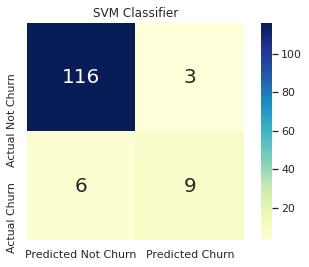

In [ ]:
print(f'Score: {svm_grid.score(X_test, y_test)}')

svm_pred = svm_grid.predict(X_test)
mse = mean_squared_error(y_test, log_pred)
rmse =  math.sqrt(mse)
print(f'RMSE: {rmse}\n')

# Classification Report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm, xticklabels = ['Predicted Not Churn', 'Predicted Churn'], yticklabels = ['Actual Not Churn', 'Actual Churn'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu", square = True);

plt.title("SVM Classifier")
plt.subplots_adjust(wspace = .3,hspace = .3)

In [ ]:
print('Accuracy of SVM Classsifier on training set: {:.2f}'
     .format(svm_grid.score(X_train, y_train)))
print('Accuracy of SVM Classsifier on testing set : {:.2f}'
     .format(svm_grid.score(X_test, y_test)))

Accuracy of SVM Classsifier on training set: 0.93
Accuracy of SVM Classsifier on testing set : 0.93


In [ ]:
Calculate_Plot_ROC(svm_grid)

## **4.5 Decision Tree**
A Decision Tree is a simple representation for classifying examples. It is made of leaf nodes and branches which means leaf node refers to a class label and branches refers to a conjunction of features that lead to those class. Decision Tree algorithm uses tree representation to classify the most important variables. Decision Tree is constructed through an algorithm approach that identifies ways to split a dataset based on multiple conditions. It is also a non-parametric supervised learning method used for both classification and regression tasks. Besides that, grid search has been used in order to find the best parameters. For example, the Gini and Entropy criterion was tested through Grid Search. 

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)

parameters = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5]
}

dt_grid = GridSearchCV(dt, parameters)
print(dt_grid.fit(X_train, y_train))

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
          

In [ ]:
print(f'Best Score: {dt_grid.best_score_}')
print(f'Best Parameter List: {dt_grid.best_params_}')

Best Score: 0.8854875683301004
Best Parameter List: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 8}


Score: 0.9104477611940298
RMSE: 0.2992528008322899

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       119
           1       0.64      0.47      0.54        15

    accuracy                           0.91       134
   macro avg       0.79      0.72      0.74       134
weighted avg       0.90      0.91      0.90       134



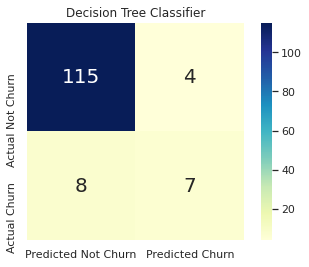

In [ ]:
print(f'Score: {dt_grid.score(X_test, y_test)}')

dt_pred = dt_grid.predict(X_test)
mse = mean_squared_error(y_test, dt_pred)
rmse =  math.sqrt(mse)
print(f'RMSE: {rmse}\n')

# Classification Report
print(classification_report(y_test, dt_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(cm, xticklabels = ['Predicted Not Churn', 'Predicted Churn'], yticklabels = ['Actual Not Churn', 'Actual Churn'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu", square = True);

plt.title("Decision Tree Classifier")
plt.subplots_adjust(wspace = .3,hspace = .3)

In [ ]:
print('Accuracy of Decision Tree Classsifier on training set: {:.2f}'
     .format(dt_grid.score(X_train, y_train)))
print('Accuracy of Decision Tree Classsifier on testing set : {:.2f}'
     .format(dt_grid.score(X_test, y_test)))

Accuracy of Decision Tree Classsifier on training set: 0.91
Accuracy of Decision Tree Classsifier on testing set : 0.91


In [ ]:
Calculate_Plot_ROC(dt_grid)

### **Feature Importance (Decision Tree)**


In [ ]:
dt_fi = pd.DataFrame(dt_grid.best_estimator_.feature_importances_)

column_df = pd.DataFrame(cols)
coef_sumry = (pd.merge(dt_fi, column_df, left_index= True, right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending = False)

trace = go.Bar(x = coef_sumry["features"], 
               y = coef_sumry["coefficients"], 
               marker = dict(color = coef_sumry["coefficients"], 
                             colorscale = "Picnic",
                             line = dict(width = .6,color = "black")))

data = [trace]
py.iplot({'data': data})


The feature importance of Decision Tree is presented in the bar chart above. Decision Tree offers importance scores based on the reduction in the criterion used to select split points such as Entropy and Gini. As displayed, **Total Day Minute** is by far the most significant feature in predicting the customer attrition with the score approximate to 0.4. Followed by the 5 features importance are **Total Evening Charge**, **Total Evening Minute**, **International Plan**, **Number Voicemail Messages** and **State** with the feature importance score approximate to 0.17, 0.11, 0.11, 0.11 and 0.10 respectively. Furthermore, the score of remaining features are all 0 which means they represent insignificant in predicting the customer attrition.

## **Visualize Decision Tree**

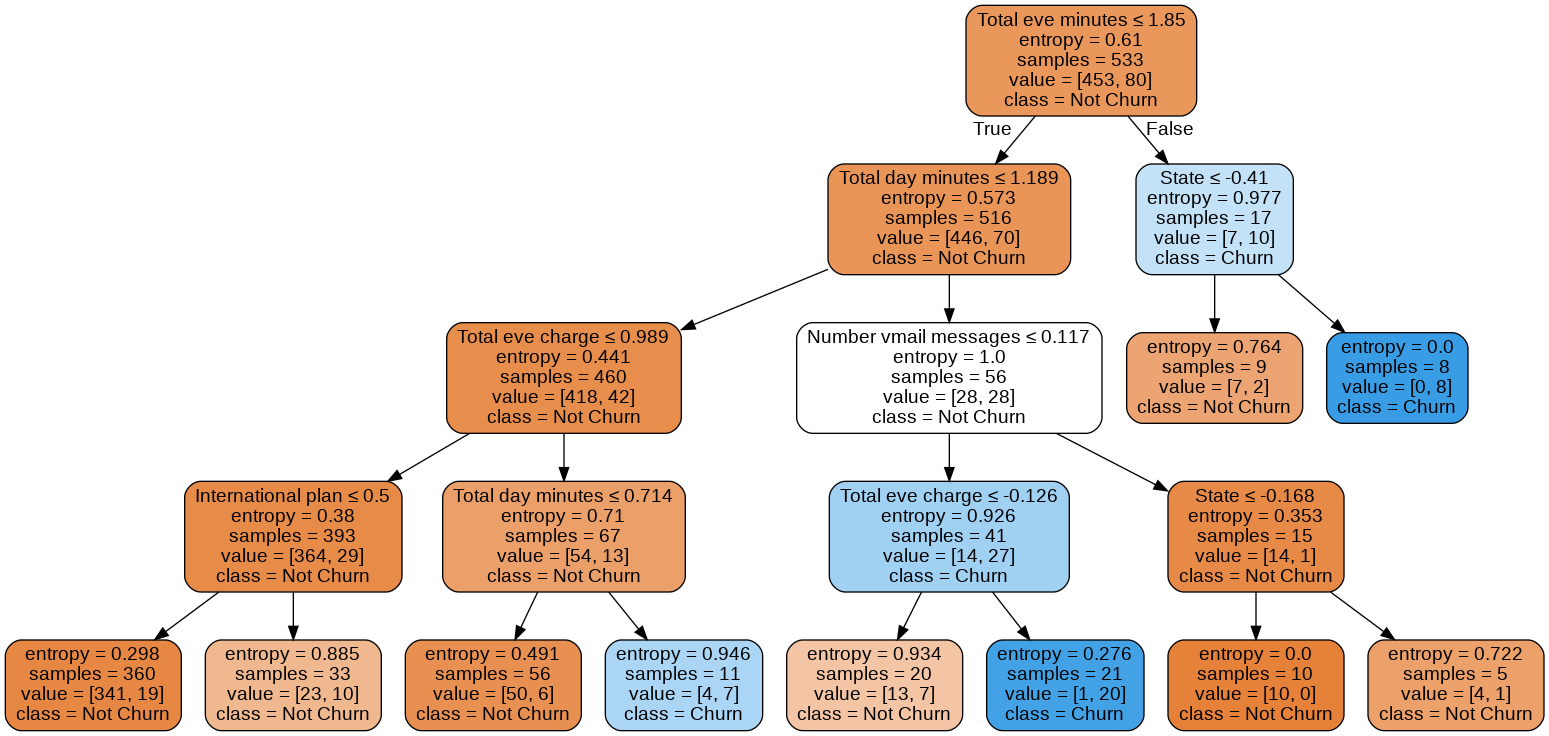

In [ ]:
# Visualize Decision Tree
dot_data = StringIO()
export_graphviz(dt_grid.best_estimator_, 
                out_file = dot_data,  
                filled = True, 
                rounded = True,
                special_characters = True, 
                feature_names = cols, 
                class_names = ['Not Churn','Churn']
                )

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())

## **4.6 Random Forest**
Random Forest Classifier is ensemble algorithm. Its algorithm incorporates a number of Decision Tree with a bootstrap aggregation. Compared to Decision Trees suffering from high variance, the Random Forest Classifier adapts to this with its entire learning technique. Random Forest is an extension of and enhancement of the Bagging method. Furthermore, some hyperparameters have been modified to change the model and increase the power of the predictions. For example, the number of 10 and 20 trees was tested through Grid Search. 

In [ ]:
rf = RandomForestClassifier(random_state = 0)

parameters = { 
    'n_estimators': [10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 5, 6, 7],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [3, 4, 5]
}

rf_grid = GridSearchCV(rf, parameters,)
print(rf_grid.fit(X_train, y_train))

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                

In [ ]:
print(f'Best Score: {rf_grid.best_score_}')
print(f'Best Parameter List: {rf_grid.best_params_}')

Best Score: 0.8986245812026098
Best Parameter List: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 10}


Score: 0.9477611940298507
RMSE: 0.22855810195691872

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       119
           1       0.90      0.60      0.72        15

    accuracy                           0.95       134
   macro avg       0.93      0.80      0.85       134
weighted avg       0.95      0.95      0.94       134



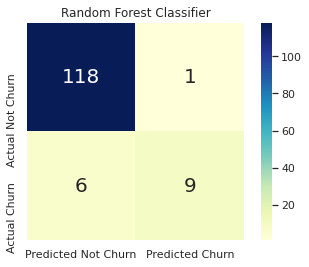

In [ ]:
print(f'Score: {rf_grid.score(X_test, y_test)}')

rf_pred = rf_grid.predict(X_test)
mse = mean_squared_error(y_test, rf_pred)
rmse =  math.sqrt(mse)
print(f'RMSE: {rmse}\n')

# Classification Report
print(classification_report(y_test, rf_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, xticklabels = ['Predicted Not Churn', 'Predicted Churn'], yticklabels = ['Actual Not Churn', 'Actual Churn'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu", square = True);

plt.title("Random Forest Classifier")
plt.subplots_adjust(wspace = .3,hspace = .3)

In [ ]:
print('Accuracy of Random Forest Classsifier on training set: {:.2f}'
     .format(rf_grid.score(X_train, y_train)))
print('Accuracy of Random Forest Classsifier on testing set : {:.2f}'
     .format(rf_grid.score(X_test, y_test)))

Accuracy of Random Forest Classsifier on training set: 0.94
Accuracy of Random Forest Classsifier on testing set : 0.95


In [ ]:
Calculate_Plot_ROC(rf_grid)

### **Feature Importance (Random Forest Classifier)**


In [ ]:
rf_fi = pd.DataFrame(rf_grid.best_estimator_.feature_importances_)

column_df = pd.DataFrame(cols)
coef_sumry = (pd.merge(rf_fi, column_df, left_index= True, right_index= True, how = "left"))
coef_sumry.columns = ["coefficients","features"]
coef_sumry = coef_sumry.sort_values(by = "coefficients", ascending = False)

trace = go.Bar(x = coef_sumry["features"], 
               y = coef_sumry["coefficients"], 
               marker = dict(color = coef_sumry["coefficients"], 
                             colorscale = "Picnic",
                             line = dict(width = .6,color = "black")))

data = [trace]
py.iplot({'data': data})

The feature importance of Random Forest Classifier is presented in the bar chart above. Random Forest is a useful algorithm when considering feature importance, therefore it was decided to include all the variables in the model. As displayed, there are 3 features that are by far the most significant feature in predicting the customer attrition which included **Total Day Minute**, **Total Day Charge** and **Customer Service Calls**. As a result, the feature importance scores are 0.15, 0.13 and 0.13 respectively. By the way, the last 3 features which do not perform well in predicting the customer attrition are included **Total Day Calls**, **Total International** and **Area Code** with the feature importance scores are only 0.017, 0.012 and 0.008.


# **5. Evaluation**
## **5.1 Model Performance Metrics**

In [ ]:
def model_report(model, training_x, testing_x, training_y, testing_y, name):
    model.fit(training_x, training_y)
    predictions  = model.predict(testing_x)
    accuracy     = accuracy_score(testing_y,predictions)
    recallscore  = recall_score(testing_y,predictions)
    precision    = precision_score(testing_y,predictions)
    f1score      = f1_score(testing_y,predictions) 
    
    df = pd.DataFrame({"Model"           : [name],
                       "Accuracy_score"  : [accuracy],
                       "Recall_score"    : [recallscore],
                       "Precision"       : [precision],
                       "f1_score"        : [f1score]
                      })
    return df

#outputs for every model
model1 = model_report(knn, X_train, X_test, y_train, y_test, "KNN Classifier")
model2 = model_report(nb, X_train, X_test, y_train, y_test, "Gaussian Naive Bayes")
model3 = model_report(log_grid, X_train, X_test, y_train, y_test, "Logistic Regression")           
model4 = model_report(svm_grid, X_train, X_test, y_train, y_test, "SVM Classifier")
model5 = model_report(dt_grid, X_train, X_test, y_train, y_test, "Decision Tree")
model6 = model_report(rf_grid, X_train, X_test, y_train, y_test, "Random Forest Classifier")

# Concat all models
model_performances = pd.concat([model1, model2, model3, model4, model5, model6], axis = 0).reset_index()

model_performances = model_performances.drop(columns = "index", axis = 1)

table  = ff.create_table(np.round(model_performances, 4))

py.iplot(table)

## **Accuracy**
The accuracy of classification is the ratio of correct predictions to the total predictions made. The Accuracy column gives information about the overall accuracy of 6 models above 90%. Well no doubt, Random Forest Classifier represents the highest accuracy score between the 6 models, which is 0.9478. Secondly, SVM Classifier performs a quite good result with an accuracy of 0.9328. Followed by the accuracy of Logistic Regression and Gaussian Naive Bayes are 0.9254 and 0.9179 which are in the mid range of the overall accuracy. Lastly, KNN Classifier and Decision Tree are having the same accuracy score which are the lowest models  0.9104. The higher accuracy score does not indicate that the algorithm is the best model. On the other hand, precision, recall and f1-score remain critical in Machine Learning. 

## **Recall**
Recall expresses the ability to find all relevant instances in a dataset. It is useful in measuring the number of false positive values in the observation and widely used in the Biomedical area for detecting diseases such as cancer. Considering the imbalanced dataset, thus it may cause the recall score to become lower. As we can see that SVM Classifier and Random Forest Classifier have a good performance on recall score and both reached the 0.6. In addition, the recall of Gaussian Naive Bayes, Logistic Regression and Decision Tree are the same which is approximately 0.4667. Lastly, KNN Classifier shows the lowest recall score which is approximately 0.3333. Since the KNN Classifier has a quite high accuracy but it is not performed well in recall score, obviously this algorithm would not decide to be used in deployment. 

## **Precision**
Precision defines the number of the predicted values which are actually correct. This metric is used when the aim is to reduce the number of False Positives (FP) in the confusion matrix. The precision is essential in the business area especially customer churn analytics. The threshold of the precision score basically needs to be higher than 0.7, as we can see there are five models that have reached this requirement. In this case, Random Forest represents the highest precision score which is approximately 0.9. While the lowest precision score is represented by Decision Tree which is approximately 0.6364 and this model is actually below than the required threshold. As for the other 4 models, their precision scores are approximately to each other which is about 0.7.

## **F1-score**
F1-score is a comparison between recall and precision. This metric is used when recall and precision are both used as metrics for model performance analysis. It could be a better metric to use if we have to look for a balance between recall and precision. First of all, Random Forest Classifier has the highest performance for f1-score which is approximately 0.72. While KNN Classifier has the lowest performance for f1-score which is only approximate to 0.4545.


## **5.2 Comparison the Performance Between Model Metrics**

In [ ]:
model_performances
def output_tracer(metric,color) :
    tracer = go.Bar(y = model_performances["Model"] ,
                    x = model_performances[metric],
                    orientation = "h",name = metric ,
                    marker = dict(line = dict(width = 0.7),
                                  color = color)
                   )
    return tracer

layout = go.Layout(dict(title = "Model Performances",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "Metrics",
                                     zerolinewidth = 1,
                                     ticklen = 5, 
                                     gridwidth = 2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     zerolinewidth=1,
                                     ticklen=5,
                                     gridwidth=2),
                        margin = dict(l = 250),
                        height = 780
                       )
                  )

trace1  = output_tracer("Accuracy_score", "#6699FF")
trace2  = output_tracer('Recall_score', "red")
trace3  = output_tracer('Precision', "#33CC99")
trace4  = output_tracer('f1_score', "lightgrey")

data = [trace1, trace2, trace3, trace4]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

**The combination bar chart has given the information among the performances of 6 models**

## **5.3 Confusion Matrices**

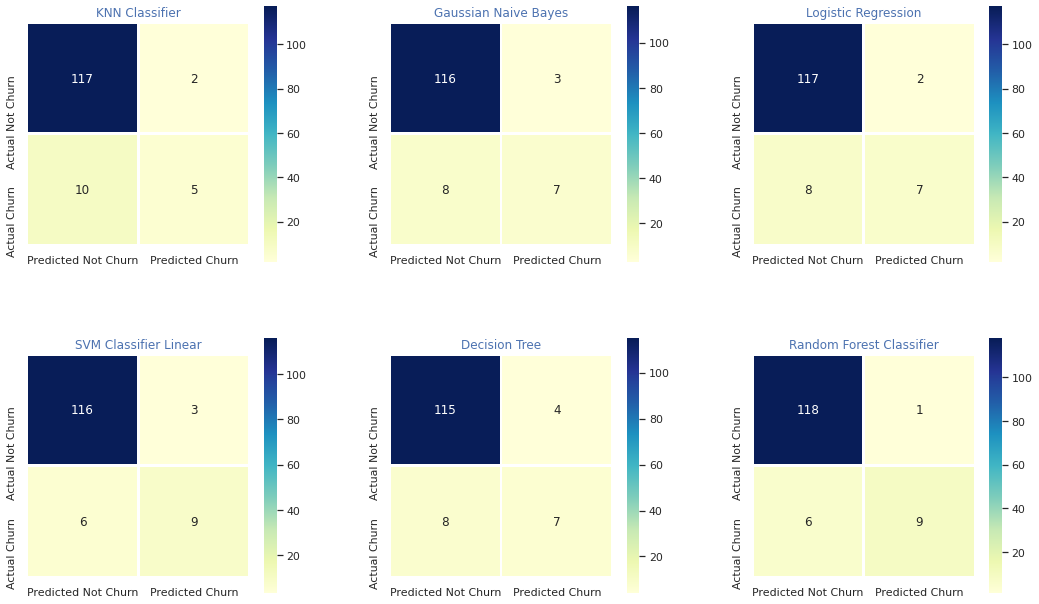

In [ ]:
lst    = [knn, nb, log_grid, svm_grid, dt_grid, rf_grid]

length = len(lst)

mods   = ['KNN Classifier', 'Gaussian Naive Bayes', 'Logistic Regression', 'SVM Classifier Linear', 'Decision Tree','Random Forest Classifier']

fig = plt.figure(figsize=(18, 23))
fig.set_facecolor("#FFFFFF")
for i,j,k in itertools.zip_longest(lst,range(length),mods) :
    plt.subplot(4, 3, j + 1)
    predictions = i.predict(X_test)
    conf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=['Predicted Not Churn', 'Predicted Churn'],
                yticklabels=['Actual Not Churn', 'Actual Churn'],
                linewidths = 2,linecolor = "w",cmap = "YlGnBu")
    plt.title(k, color = "b")
    plt.subplots_adjust(wspace = .3,hspace = .3)

## **5.4 Receiver Operating Characteristics (ROC) & Area Under Curve (AUC)**

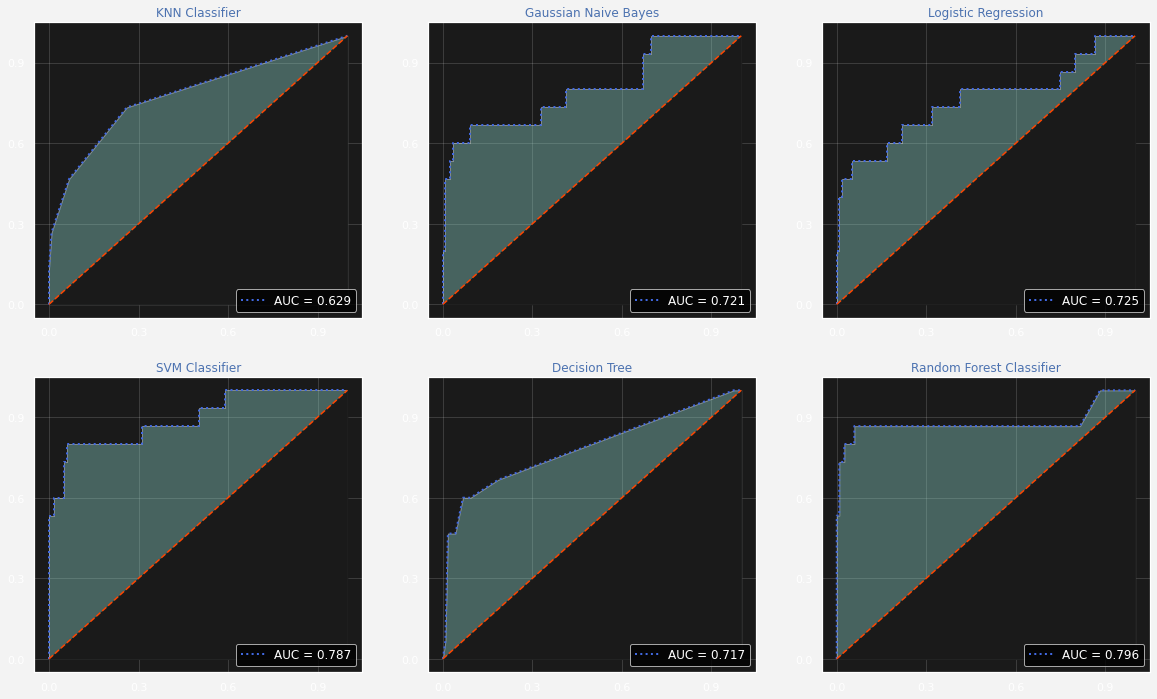

In [ ]:
lst    = [knn_grid, nb, log_grid, svm_grid, dt_grid, rf_grid]

length = len(lst)

mods   = ['KNN Classifier','Gaussian Naive Bayes', 'Logistic Regression', 'SVM Classifier', 'Decision Tree','Random Forest Classifier']

plt.style.use("dark_background")
fig = plt.figure(figsize = (20, 25))
fig.set_facecolor("#F3F3F3")

for i, j, k in itertools.zip_longest(lst, range(length), mods) :
    qx = plt.subplot(4, 3, j + 1)
    probabilities = i.predict_proba(X_test)
    predictions   = i.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test,probabilities[:, 1])
    plt.plot(fpr, tpr, linestyle = "dotted",
             color = "royalblue",linewidth = 2,
             label = "AUC = " + str(np.around(roc_auc_score(y_test,predictions), 3)))
    plt.plot([0, 1], [0, 1], linestyle = "dashed",
             color = "orangered", linewidth = 1.5)
    plt.fill_between(fpr, tpr, alpha = 0.4)
    plt.fill_between([0, 1], [0, 1], color = "k")
    plt.legend(loc = "lower right",
               prop = {"size" : 12})
    qx.set_facecolor("k")
    plt.grid(True, alpha = .15)
    plt.title(k, color = "b")
    plt.xticks(np.arange(0, 1, 0.3))
    plt.yticks(np.arange(0, 1, 0.3))

From the figure above, the ROC-curves for the three models and the AUC are displayed for these 6 models. The AUC score does not differ significantly except for the KNN Classifier and Decision Tree which have a worse performance in this analysis. The AUC score is basically approximately 0.629 and 0.717 respectively. Yet, it can be concluded that Random Forest Classifier generates the highest AUC score which is approximately 0.796 and thereby the best performing model when analyzing this measurement. 


# **6. Deployment**
The main purpose of this analysis is to define the customer attrition and predict when attrition / churn is about to happen. The result has shown that attrition could be predicted with an overall accuracy score of 94.78%. As this result is achieved by Random Forest Classifier. It can be concluded that all models generated produced overall good results except KNN Classifier. Although it has a quite high performance on accuracy and precision but the other results are actually unsatisfactory. In addition, the most important feature was shown to be Total Day Minute. As for the AUC score, Random Forest Classifier generated the highest score and hence it is considered to be the most accurate and reliable model in this analysis.

## **Model Selection**
Random Forest Classifier has the best performance amomg 6 models and it would be a recommended model.






# **7. Conclusion**
Advantages and disadvantages of the following algorithm used

## **7.1 KNN Classifier**
### **Advantage**

*   KNN is very easy to implement as there are only two parameters which are the value of K and the distance function required to implement KNN

*   KNN algorithm does not require training before making prediction therefore new data can be added any time which will not impact the accuracy of the algorithm

### **Disadvantage**

*   KNN does not work well with large dataset or imbalanced dataset. The cost of calculating the distance between the new point and each existing point is huge which degrades the performance of the algorithm.

*   KNN does not work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

---

## **7.2 Gaussian Naive Bayes**
### **Advantage**

* Naive Bayes requires a small amount of training data to estimate the testing set. So, the training period is less.

* When the assumptions of its independent predictors are true, the performance of the Naive Bayes will be better than other models.

### **Disadvantage**

*	Main limitation of Naive Bayes is the assumption of independent predictors. Naive Bayes implicitly assume that all the attributes in a dataset are mutually independent but in real life, it is almost impossible that we could get a dataset with a set of predictors which are completely independent from each other.

*	If categorical variable has a category (in testing set), which was not observed in training set, then model will assign a 0 (zero) probability and will be unable to make a prediction. This is often known as “Zero Frequency”. To solve this, we can use the smoothing technique. One of the simplest smoothing techniques is called Laplace estimation.


---

## **7.3 Logistics Regression**
### **Advantage**

* Logistics Regression is very efficient as it does not need too much computational power and resources as compared to Random Forest Classifier.

* Logistics Regression is highly interpretable, it does not require input features to be scaled, it does not require any tuning, it is easy to regularize and it outputs well-calibrated predicted probabilities.

### **Disadvantage**

* This algorithm can only be used to predict discrete functions. Hence, the dependent variable in the dataset is restricted to the discrete number set.

* The main limitation of Logistic Regression is it cannot solve non-linear problems since its decision surface is linear. In the real world, the data is rarely linearly separable and most of the time data would be mixed up and not in an order.

---

## **7.4 Support Vector Machine Classifier**
### **Advantage**

* SVM is more effective in high dimensional spaces which means in the case of number of dimensions is greater than the number of samples.

*	The hyperplane is affected by only the support vectors thus outliers have less impact.

### **Disadvantage**

*	SVM algorithm works by putting data points, above and below the classifying hyperplane. Hence, there is not probabilistic explanation for the classification.

*	SVM algorithm is not suitable for large dataset as it requires large amount of time to process the large dataset. In another word, it is less efficient.

---

## **7.5 Decision Tree**
### **Advantage**

* Decision tree is easy to understand and interpret as it looks like simple if-else statements and it is perfect for visual representation. This is an example of white box model, which closely mimics the human decision-making process.

* The training period of decision tree is less as compared to Random Forest because it generates only one tree unlike by default 100 trees are generated in the Random Forest Classifier.

### **Disadvantage**

* Decision Tree is relatively unstable as compared to Random Forest Classifier. This is because when adding a new data point can lead to re-generation of the overall tree and all nodes within the tree need to be recalculated and recreated.

* Decision Tree is not suitable for large dataset. The single tree may grow complex and lead to overfitting and there are very high chances of high variance in the output which leads to many errors in the final estimation and shows high inaccuracy in the results.

---

## **7.6 Random Forest Classifier**
### **Advantage**

* Random Forest Classifier has an effective method for handling missing data in the dataset and maintains accuracy when large proportion of the data are missing from the dataset given.

* Random Forest Classifier creates as many trees on the subset of the data and combines the output of all the trees. Therefore, by using Random Forest Classifier, the overfitting problem and variance in a single decision tree can be reduced hence the accuracy can be improved.

### **Disadvantage**

* Random Forest Classifier is complex as it creates a lot of tree which by default is 100 trees in Python sklearn library and combines their output. In order to achieve this, this algorithm requires much more computational power and resources.

* Random Forest Classifier requires much more time to train as it generates a lot of trees and make decision on majority of votes.